In [28]:
import pandas
import pandas as pd
import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pd.read_csv("reviews.csv", parse_dates=["Timestamp"])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


## Rating average by day

In [42]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).count()


,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15
...,...,...,...,...
2021-03-29,25,25,25,1
2021-03-30,35,35,35,1
2021-03-31,32,32,32,3


In [36]:
#day_average['Day'] -- its converted to index it's not a column
day_average2 = pd.DataFrame(day_average)
day_average2.index

Index([2018-01-01, 2018-01-02, 2018-01-03, 2018-01-04, 2018-01-05, 2018-01-06,
       2018-01-07, 2018-01-08, 2018-01-09, 2018-01-10,
       ...
       2021-03-24, 2021-03-25, 2021-03-26, 2021-03-27, 2021-03-28, 2021-03-29,
       2021-03-30, 2021-03-31, 2021-04-01, 2021-04-02],
      dtype='object', name='Day', length=1188)

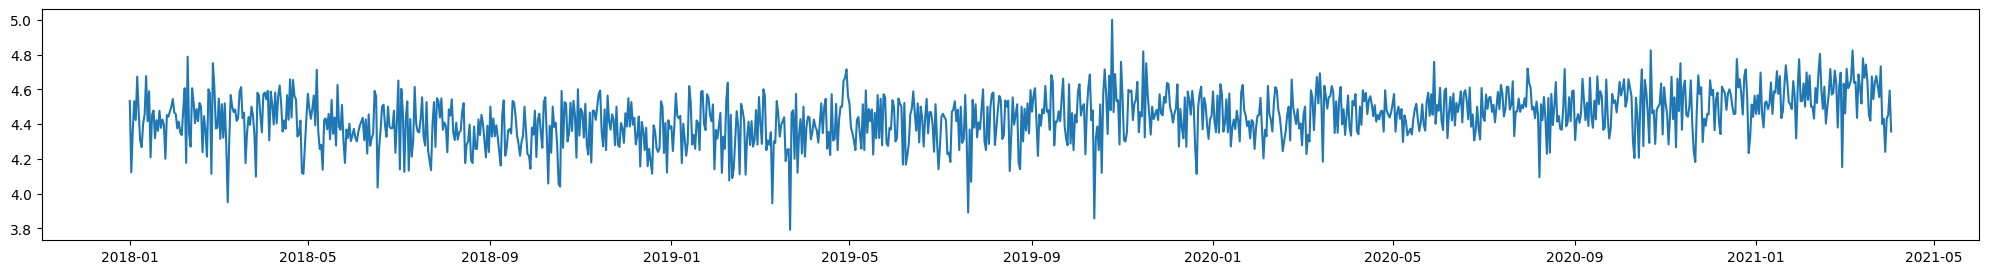

In [40]:
plt.figure(figsize=(25,3))
plt.plot(day_average2.index, day_average2['Rating'])


## Rating average by week

In [70]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
data['Week']
week_average = pd.DataFrame(data.groupby(['Week'])['Rating'].mean())
week_average

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


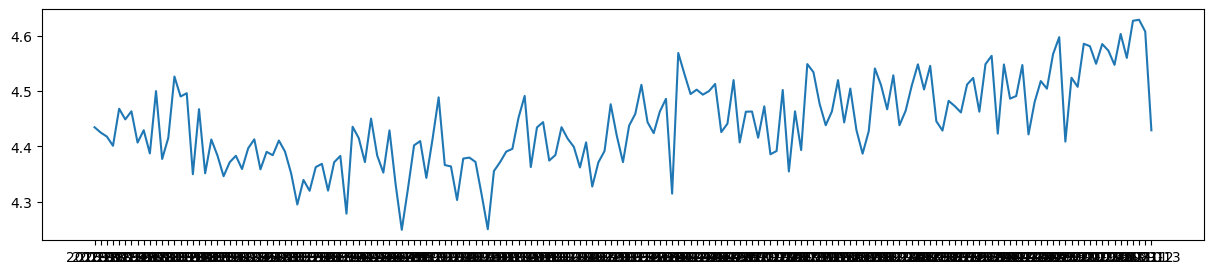

In [50]:
plt.figure(figsize=(15,3))
plt.plot(week_average.index, week_average['Rating'])

## Average rating by month

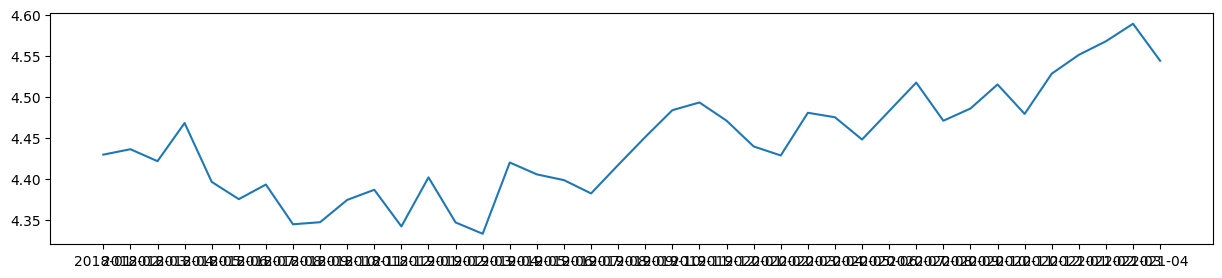

In [52]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = pd.DataFrame(data.groupby(['Month'])['Rating'].mean())
plt.figure(figsize=(15,3))
plt.plot(month_average.index, month_average['Rating'])

## Average rating by month by course

<Axes: xlabel='Month'>

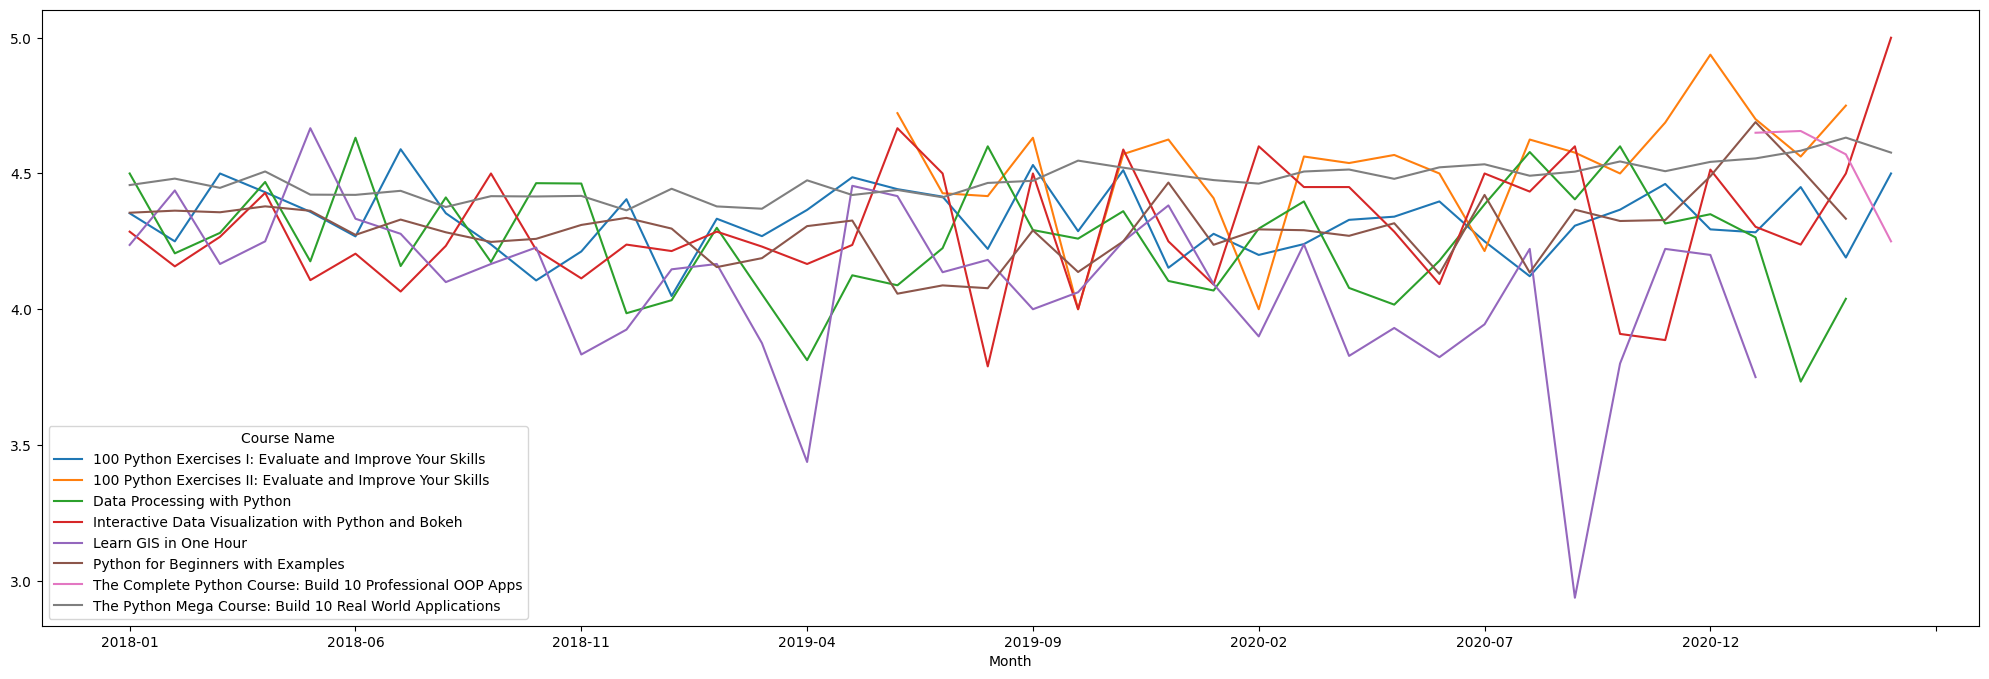

In [64]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_bycourse = pd.DataFrame(data.groupby(['Month', 'Course Name'])['Rating'].mean().unstack())
month_average_bycourse.plot(figsize=(25,8))

## Number of ratings by month by course

<Axes: xlabel='Month'>

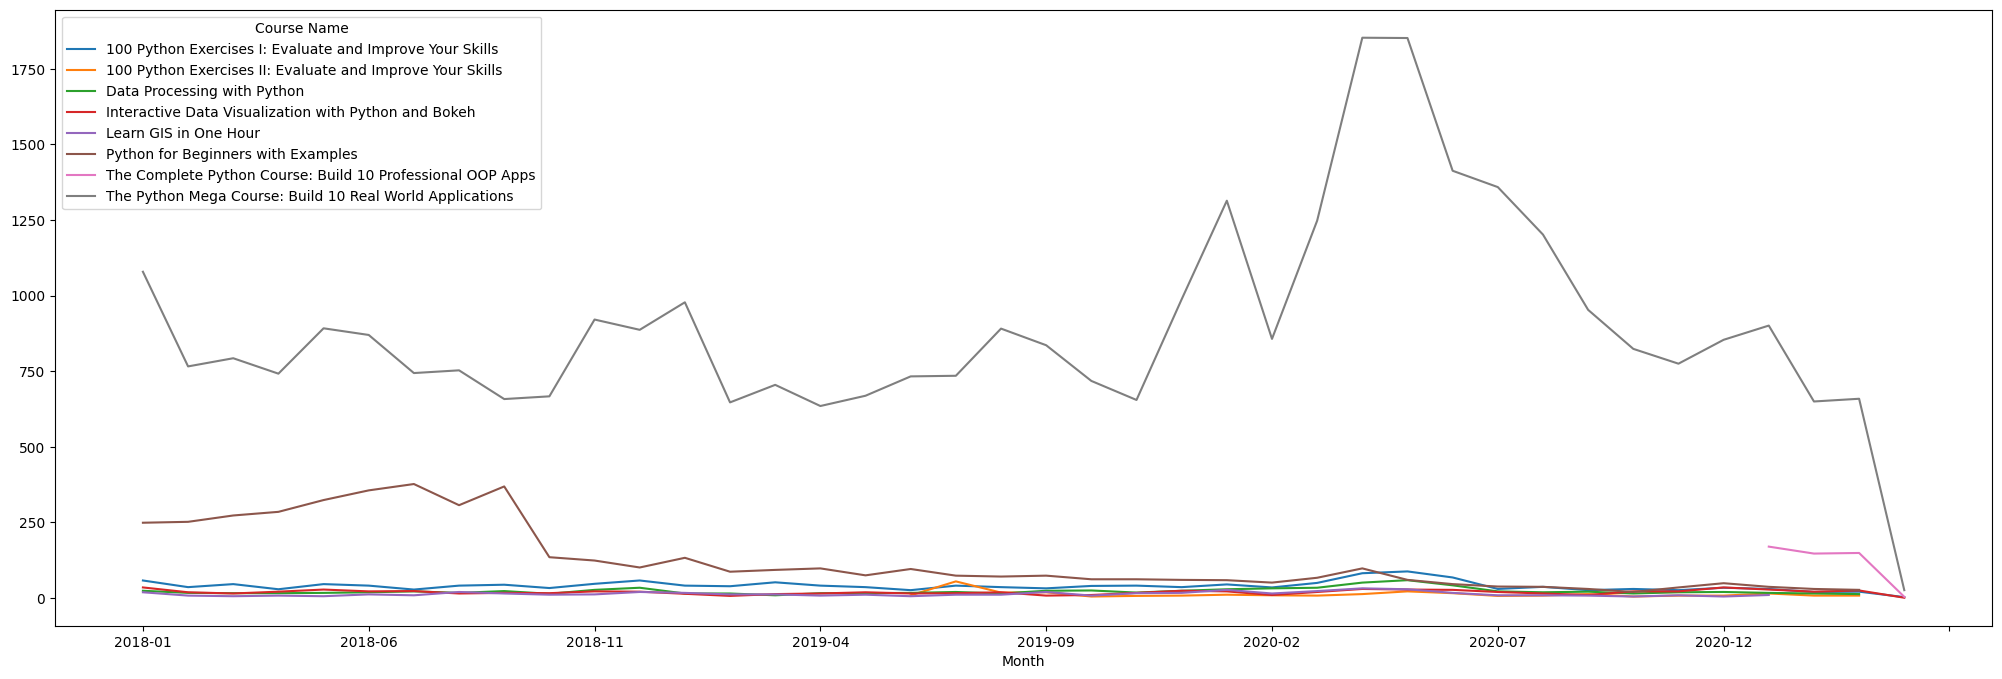

In [65]:
pd.DataFrame(data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()).plot(figsize=(25,8))

## What is the happiest day?

In [75]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = pd.DataFrame(data.groupby(['Weekday', 'Daynumber'])['Rating'].mean())
weekday_average = weekday_average.sort_values('Daynumber')


,,Rating
Weekday,Daynumber,
Sunday,0,4.439097
Monday,1,4.449335
Tuesday,2,4.446240
Wednesday,3,4.427452
Thursday,4,4.437880
Friday,5,4.455207
Saturday,6,4.440274


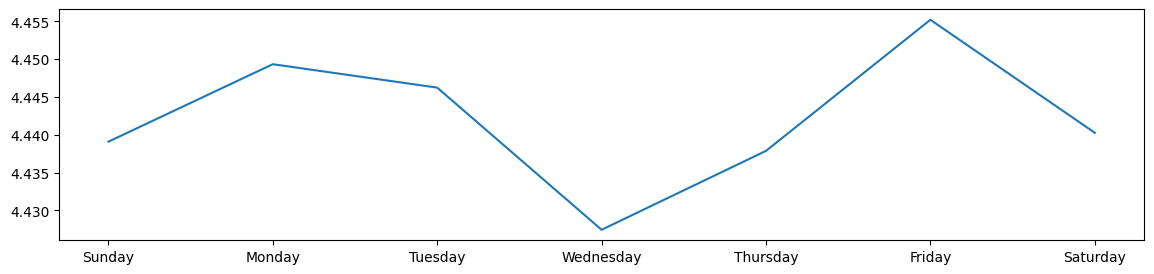

In [85]:
plt.figure(figsize=(14,3))
plt.plot(weekday_average.index._get_level_values(0), weekday_average['Rating'])

In [86]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_docstring',
 '_draw_all_if_interactive',
 '_get_backend_mod',
 '_get_pyplot_commands

## Number of ratings by course

In [87]:
share = data.groupby(['Course Name'])['Rating'].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x21f8b9cb160>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

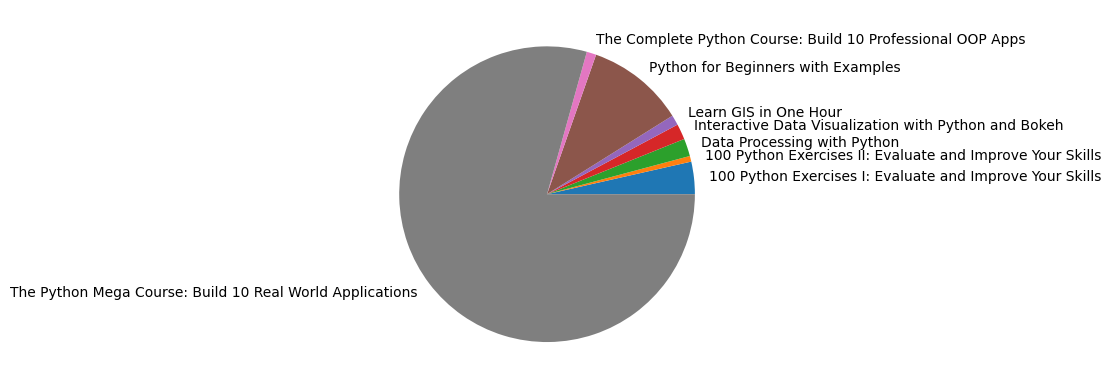

In [89]:
plt.pie(share, labels= share.index)